## Manual fitting vs OLS

#### Introduction to data fitting

The table below show the relation between two variables x and z.

|   |   |   |   |   |   |   |   |   |   |
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:| 
| x | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 |
| z | 1.3 | 2.2 | 3.9 | 5.5 | 6.0 | 7.5 | 9.0 | 9.8 | 11 |

1. Create variables `x` and `z` to hold the data.

Import `numpy`

In [1]:
import numpy as np

Use `numpy.arange()` to create variable `x`

In [2]:
x = np.arange(1,10,1)

Use `numpy.array()` to create variable `z`

In [3]:
z = np.array([1.6, 2.2, 3.9, 5.5, 6.0, 7.5, 9.5, 9.8, 11])

2. Plot the data points

Import `matplotlib.pyplot`

In [4]:
import matplotlib.pyplot as plt

Use the `scatter()` function to plot the points. 

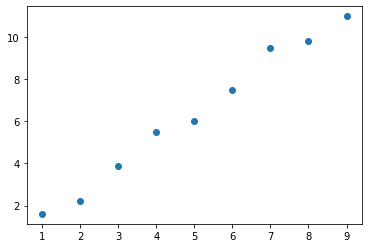

In [5]:
plt.scatter(x,z)

3. Draw a straight line using the equation: $\hat{z} = \beta_0 + \beta_1 x$ that can best fit the data points. Plot the data points and your fit line. Use the `legend()` function to specifiy labels for the different data. 

Change the values $\beta_0$ and $\beta_1$ to give the best fit visually (allow for 5 maximum number of trials). Record the final values for $\beta_0$ and $\beta_1$. 

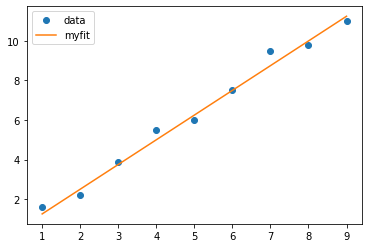

In [6]:
zhat = 0 + 1.25*x
fig, ax = plt.subplots() 
ax.plot(x, z, "o", x, zhat, "-") 
plt.legend(["data", "myfit"], loc="best")

#### OLS method - Main Terminologies
1. For the previous example, use the equations presented in the video to calculate $\beta_0$ and $\beta_1$. 

Use `numpy.mean()` to calculate the mean of `x` and `z`. Store the results in variables `x_avg` and `z_avg`.

In [7]:
# calculate average of x
x_avg = np.mean(x)

In [8]:
# calculate average of z
z_avg = np.mean(z)

Apply the equation to calculate the value of $\beta_1$ and store it in variable `b1`. Use `numpy.sum()`.

$$\beta_1 = \frac{\sum_{i=1}^{n} (x_i - x_{avg})(z_i - z_{avg})}{\sum_{i=1}^{n} (x_i - x_{avg})^2}$$

In [9]:
# calcualte b1
b1 = np.sum((x-x_avg)*(z-z_avg))/np.sum((x-x_avg)**2)
b1

1.2266666666666668

Apply the equation to calculate the value of $\beta_0$.

$$ \beta_0 = z_{avg} - \beta_1 x_{avg}$$

In [10]:
# calculate b0
b0 = z_avg - b1*x_avg
b0

0.1999999999999993

Calculate $\hat{z}$ for this model. Store it in a variable `zhat_ols`.

In [11]:
zhat_ols = b0 + b1*x

2. Calculate the error sum of squares, $SS_E$, for the past two models.

$$ SS_E = \sum_{i=1}^{n} (z_i - \hat{z_i})^2 $$

In [12]:
# calculate SSE for your model
SSE_mymodel = np.sum((z-zhat)**2)
SSE_mymodel

1.2124999999999997

In [13]:
# calculate SSE for the OLS model
SSE_ols = np.sum((z-zhat_ols)**2)
SSE_ols

1.1173333333333324

Which model has lower $SS_E$?

Now change the values of $\beta_0$ and $\beta_1$ in step 3 and note the change in $SS_E$ with each change.

#### Model Evaluation

Create a function to calculate the values of $R^2$, $RMSE$, $MBE$ and $DW$.

In [14]:
def modelevaluation(z, zhat, n, k):
    RMSE = np.sqrt(np.sum((z-zhat)**2)/(n-k))
    MBE = np.sum(z-zhat)/(n-k)
    SSR = np.sum((zhat - np.mean(z))**2)
    SST = np.sum((z - np.mean(z))**2)
    SSE = np.sum((z-zhat)**2)
    Rsqr = 1 - SSE/SST
    err = z - zhat
    DW = (np.sum((np.diff(err))**2))/sum(err**2)

    print('RMSE = ', RMSE)
    print('MBE = ', MBE)
    display(Latex(f'$R^2$ = {Rsqr}'))
    print('DW = ', DW)

Run the function for your model and the model created by using the OLS method. Note the difference in the results.

In [15]:
from IPython.display import display, Latex
modelevaluation(z, zhat, 9, 2)

RMSE =  0.4161902037702061
MBE =  0.10714285714285728


<IPython.core.display.Latex object>

DW =  2.3422680412371126


In [16]:
modelevaluation(z, zhat_ols, 9, 2)

RMSE =  0.39952352573915784
MBE =  1.5860328923216522e-16


<IPython.core.display.Latex object>

DW =  2.5206046141607006


### Self-learning exercises 

1. Run the below cells. Change the values of the model parameters $\beta_0$, $\beta_1$, $\beta_2$, $\beta_3$ and $\beta_4$ one at a time and note the changes in the plot and values of $SSE$, $Rsqr$ and $DW$. Do you think it is possible to fit a model to such data manually? Initial values have been given to help you with the process.

In [17]:
import ipywidgets as widgets

In [18]:
%matplotlib widget

In [19]:
# create figure
fig, ax = plt.subplots(figsize=(10, 4))
plt.suptitle('Linear model')

# synthetic input data
np.random.seed(0)
x = np.linspace(-1,1,30)
z = x - 2 * (x ** 2) + 0.5 * (x ** 3) + 0.2 * (x ** 4) + np.random.normal(-0.1, 0.1, 30)

# function to update plot based on input model parameters
def update_plot(b4, b3, b2, b1, b0):
    ax.clear()
    y = b4*x**4 + b3*x**3 + b2*x**2 + b1*x + b0
    SSE = np.sum((z-y)**2)
    SST = np.sum((z - np.mean(z))**2)
    Rsqr = 1 - SSE/SST
    err = z - y
    DW = (np.sum((np.diff(err))**2))/sum(err**2)
    evalu = 'SSE= {} \nRsq = {} \nDW = {}'
    ax.plot(x,y,'-', label=evalu.format(SSE,Rsqr,DW))
    ax.scatter(x,z,s=20, c="orange")
    ax.set(ylabel = 'y', xlabel = 'x')
    ax.legend(loc='best')
    plt.show()

# create widgets
b4 = widgets.FloatText(value=0.5, description=r'\(\beta_4\)')
b3 = widgets.FloatText(value=0.5, description=r'\(\beta_3\)')
b2 = widgets.FloatText(value=-1.5977, description=r'\(\beta_2\)')
b1 = widgets.FloatText(value=0.6048, description=r'\(\beta_1\)')
b0 = widgets.FloatText(value=-0.0922, description=r'\(\beta_0\)')
# left_box = widgets.VBox([b0, b1, b2])
# right_box = widgets.VBox([b3, b4])
# widgets.HBox([left_box, right_box])

# call function update_plot when changing the model parameters values
widgets.interactive(update_plot, b4=b4, b3=b3, b2=b2, b1=b1, b0=b0)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

interactive(children=(FloatText(value=0.5, description='\\(\\beta_4\\)'), FloatText(value=0.5, description='\\…

2. Run the below cells. Note the changes in model parameters (coef) and other evaluation values shown in the table printed, each time you change the model degree. Compare the OLS parameters results to the values you tried in the last exercise.

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
from sklearn.preprocessing import PolynomialFeatures

In [22]:
import statsmodels.api as sm

In [23]:
# create another figure
fig, ax1 = plt.subplots(figsize=(10, 4))
plt.suptitle('Linear model')

# same synthetic data used in exercise 1
np.random.seed(0)
x = np.linspace(-1,1,30)
z = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-0.1, 0.1, 30)

# define function for plot update when changing the degree widget
def update_plot(deg):
    ax1.clear()
    
    # use sklearn functions to fit the data given different model degrees
    x1 = x[:, np.newaxis]
    y1 = z[:, np.newaxis]
    polynomial_features= PolynomialFeatures(degree=deg)
    x_poly = polynomial_features.fit_transform(x1)
    model = LinearRegression()
    model.fit(x_poly, y1)
    y_poly_pred = model.predict(x_poly)
    X = x_poly
    
    # calculate and display the evaluation values
    SSE = np.sum((y1-y_poly_pred)**2)
    SST = np.sum((y1 - np.mean(y1))**2)
    Rsqr = 1 - SSE/SST
    err = z - np.reshape(y_poly_pred, (30,))
    DW = (np.sum((np.diff(err))**2))/sum(err**2)
    evalu='SSE = {} \nRsq = {} \nDW = {}'
    
    # plot the updated model and data
    ax1.plot(x,y_poly_pred,'-', label=evalu.format(SSE,Rsqr,DW))
    ax1.scatter(x,z,s=20, c="orange")
    ax1.set(ylabel = 'y', xlabel = 'x')
    ax1.legend(loc='best')
    plt.show()
    
    # print the updated OLS regression results
    model = sm.OLS(z, X)
    results = model.fit()
    print(results.summary())
    
# set the degree widget and call function update_plot
deg = widgets.IntText(value=1)

widgets.interactive(update_plot, deg = deg)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

interactive(children=(IntText(value=1, description='deg'), Output()), _dom_classes=('widget-interact',))